In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Softmax, Input, Concatenate, BatchNormalization, LSTM, Reshape
from keras.optimizers import Adam, SGD
from keras import regularizers
import matplotlib.pyplot as pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import random
import pickle as pk


In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/office31/trainx.pkl', 'rb') as file:
    trainx = pk.load(file)
with open('/content/gdrive/MyDrive/Colab Notebooks/office31/trainy.pkl', 'rb') as file:
    trainy = pk.load(file)
with open('/content/gdrive/MyDrive/Colab Notebooks/office31/testx.pkl', 'rb') as file:
    testx = pk.load(file)
with open('/content/gdrive/MyDrive/Colab Notebooks/office31/testy.pkl', 'rb') as file:
    testy = pk.load(file)

In [ ]:
print((trainx.shape), (testx.shape))

print((trainy.shape), (testy.shape))

(2265, 256, 256, 1) (552, 256, 256, 1)
(2265, 31) (552, 31)


In [ ]:
def build_model(inputShape, loss):
    dl_model = Sequential()

    dl_model.add(Conv2D(3, 3, activation='relu', dilation_rate=2, input_shape=inputShape))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(BatchNormalization())
    dl_model.add(MaxPool2D((2, 2)))
    dl_model.add(Dropout(0.2))

    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(BatchNormalization())
    dl_model.add(MaxPool2D((2, 2)))
    dl_model.add(Dropout(0.2))

    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(Conv2D(3, 3, activation='relu'))
    dl_model.add(BatchNormalization())
    dl_model.add(MaxPool2D((2, 2)))
    dl_model.add(Dropout(0.2))

    dl_model.add(Reshape((12, 144)))

    dl_model.add(LSTM(128, activation="tanh", return_sequences=True))
    dl_model.add(LSTM(64, activation="tanh"))
    dl_model.add(Dropout(rate=0.1))

    dl_model.add(Flatten())

    dl_model.add(Dense(31, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.001)))

    opt = SGD(lr=0.01, momentum=0.9)

    dl_model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    dl_model.summary()

    return dl_model


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 252, 252, 3)       30        
                                                                 
 conv2d_139 (Conv2D)         (None, 250, 250, 3)       84        
                                                                 
 conv2d_140 (Conv2D)         (None, 248, 248, 3)       84        
                                                                 
 conv2d_141 (Conv2D)         (None, 246, 246, 3)       84        
                                                                 
 batch_normalization_39 (Ba  (None, 246, 246, 3)       12        
 tchNormalization)                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 123, 123, 3)       0         
 ng2D)                                               

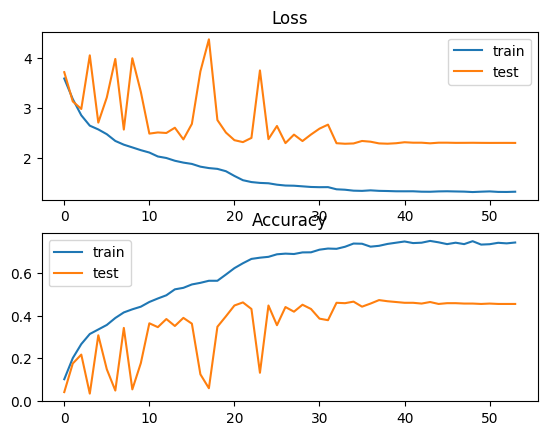

In [ ]:
inputShape = (trainx.shape[1], trainx.shape[2], trainx.shape[3])
model = build_model(inputShape, 'categorical_crossentropy')

earlystopper = EarlyStopping(patience=20, verbose=1)

checkpointer = ModelCheckpoint(filepath = '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5', verbose=1, save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.000001, verbose=1, cooldown=1)

filepath= '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5'

history = model.fit(trainx, trainy, batch_size=16, epochs=200, validation_data=(testx, testy), verbose=1,callbacks=[earlystopper, checkpointer, reduce_lr])

_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 252, 252, 3)       30        
                                                                 
 conv2d_163 (Conv2D)         (None, 250, 250, 3)       84        
                                                                 
 conv2d_164 (Conv2D)         (None, 248, 248, 3)       84        
                                                                 
 conv2d_165 (Conv2D)         (None, 246, 246, 3)       84        
                                                                 
 batch_normalization_45 (Ba  (None, 246, 246, 3)       12        
 tchNormalization)                                               
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 123, 123, 3)       0         
 ng2D)                                               

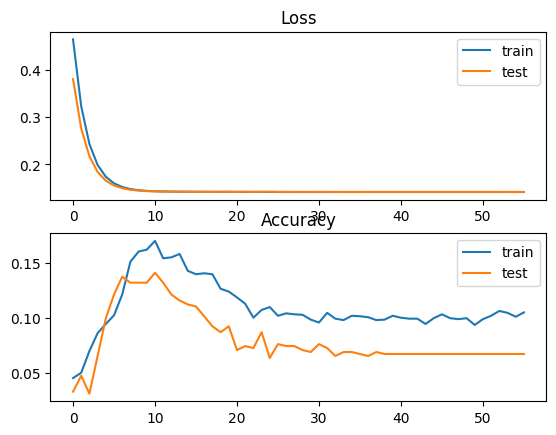

In [ ]:
inputShape = (trainx.shape[1], trainx.shape[2], trainx.shape[3])
model = build_model(inputShape, 'poisson')

earlystopper = EarlyStopping(patience=20, verbose=1)

checkpointer = ModelCheckpoint(filepath = '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5', verbose=1, save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.000001, verbose=1, cooldown=1)

filepath= '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5'

history = model.fit(trainx, trainy, batch_size=16, epochs=200, validation_data=(testx, testy), verbose=1,callbacks=[earlystopper, checkpointer, reduce_lr])

_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
def cc_po_loss(alpha):
  def loss_func(ypred, ytrue):
    cc = keras.losses.categorical_crossentropy(ypred, ytrue)
    po = keras.losses.poisson(ypred, ytrue)
    return alpha*cc + (1-alpha)*po
  return loss_func

custom_loss = cc_po_loss(alpha=0.8)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_186 (Conv2D)         (None, 252, 252, 3)       30        
                                                                 
 conv2d_187 (Conv2D)         (None, 250, 250, 3)       84        
                                                                 
 conv2d_188 (Conv2D)         (None, 248, 248, 3)       84        
                                                                 
 conv2d_189 (Conv2D)         (None, 246, 246, 3)       84        
                                                                 
 batch_normalization_51 (Ba  (None, 246, 246, 3)       12        
 tchNormalization)                                               
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 123, 123, 3)       0         
 ng2D)                                               

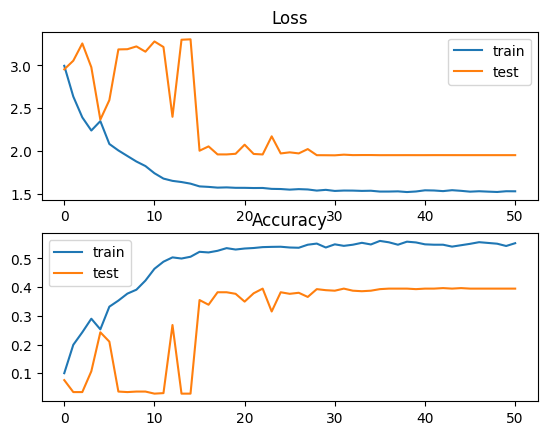

In [ ]:
inputShape = (trainx.shape[1], trainx.shape[2], trainx.shape[3])
model = build_model(inputShape, custom_loss)

earlystopper = EarlyStopping(patience=20, verbose=1)

checkpointer = ModelCheckpoint(filepath = '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5', verbose=1, save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.000001, verbose=1, cooldown=1)

filepath= '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5'

history = model.fit(trainx, trainy, batch_size=16, epochs=200, validation_data=(testx, testy), verbose=1,callbacks=[earlystopper, checkpointer, reduce_lr])

_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
class StoreEpochs(keras.callbacks.Callback):
  def __init__(self, epoch:int=0):
    super().__init__()
    self.my_epoch = keras.backend.variable(epoch)

  def on_epoch_begin(self, epoch, logs=None):
    keras.backend.set_value(self.my_epoch, epoch)

def alpha_update(epoch):
  if epoch<100:
    return 1.0 - 0.01*epoch
  return 0.0

def cc_po_varying_mix_loss():
  def loss_func(ypred, ytrue):

    alpha = alpha_update(epoch = store_epochs.my_epoch)
    cc = keras.losses.categorical_crossentropy(ypred, ytrue)
    po = keras.losses.poisson(ypred, ytrue)

    return alpha*cc + (1-alpha)*po
  return loss_func

store_epochs = StoreEpochs()
custom_loss = cc_po_varying_mix_loss()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_294 (Conv2D)         (None, 252, 252, 3)       30        
                                                                 
 conv2d_295 (Conv2D)         (None, 250, 250, 3)       84        
                                                                 
 conv2d_296 (Conv2D)         (None, 248, 248, 3)       84        
                                                                 
 conv2d_297 (Conv2D)         (None, 246, 246, 3)       84        
                                                                 
 batch_normalization_78 (Ba  (None, 246, 246, 3)       12        
 tchNormalization)                                               
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 123, 123, 3)       0         
 ng2D)                                               

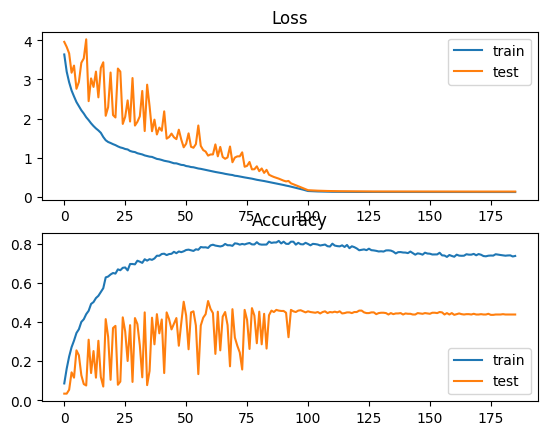

In [ ]:
inputShape = (trainx.shape[1], trainx.shape[2], trainx.shape[3])
model = build_model(inputShape, custom_loss)

earlystopper = EarlyStopping(patience=20, verbose=1)

checkpointer = ModelCheckpoint(filepath = '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5', verbose=1, save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.000001, verbose=1, cooldown=1)

filepath= '/content/weight/model.{epoch:02d}-{loss:.6f}.hdf5'

history = model.fit(trainx, trainy, batch_size=16, epochs=200, validation_data=(testx, testy), verbose=1,callbacks=[store_epochs, earlystopper, checkpointer, reduce_lr])

_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()